<a href="https://colab.research.google.com/github/muhammadfawad538/CNN/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA) | 15-July-2025


***Principal Component Analysis (PCA)*** is a dimensionality reduction technique used in data analysis and machine learning.
*   It **simplifies complex datasets** by transforming the original features into a smaller set of uncorrelated variables called principal components, which capture the most important information.
*   These **principal components are linear combinations** of the original features, and **they are ordered by the amount of variance** they explain in the data.

**------------- Benefits of Principal Component Analysis -------------**
1. **Dimensionality Reduction**
* Reduces features while keeping most of the variance (information).
* Makes models faster, especially with high-dimensional datasets.

2. **Noise Reduction**
* Removes components with low variance, which are often noise.
* -> Helps improve generalization and reduce overfitting.

3. **Improved Visualization**
* Allows you to visualize high-dimensional data in 2D or 3D.

4. **Feature Independence**
* Transforms correlated features into uncorrelated components.

5. **Better Performance (Sometimes)**
* When applied wisely, PCA can boost performance for certain algorithms (Linear Regression, Logistic Regression, Naive Bayes) by removing redundant features.


**------------- Limitations of Principal Component Analysis  -------------**
1. **Loss of Interpretability**
* PCA creates new features (components) that are linear combinations of original features.
* You lose clear feature names and meaning

2. **Linear Assumption**
* PCA only captures linear relationships.
* Non-linear structures in the data won’t be captured.

3. **May Discard Useful Features**
* If important features don’t have high variance, they might get dropped.
* Can lead to loss of predictive power.

4. **Sensitive to Scaling**
* PCA is affected by feature scale, so you must standardize or normalize your data first.
* Forgetting to scale can lead to incorrect components.

5. **Not Always Helpful**
* For small or already optimized datasets, PCA might not improve or might even hurt performance.

***Applications of PCA:***
* **Image compression:** Reducing the number of pixels in an image while preserving essential details.
* **Face recognition:** Identifying faces by extracting key features.
* **Gene expression analysis:** Finding patterns in gene expression data.
* **Data visualization:** Reducing the dimensionality of data to make it easier to plot and understand.
* **Feature extraction:** PCA can be used to create a new set of features for use in other machine learning algorithms.


# On IRIS Dataset

In [ ]:
# Install required libraries (if running in Colab)
!pip install -q scikit-learn matplotlib seaborn


In [ ]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load Iris dataset
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:

X = data.data
y = data.target
target_names = data.target_names

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Before Applying PCA (Without PCA)
print("Original number of features:", X_train.shape[1])


Original number of features: 4


In [ ]:

# Logistic Regression WITHOUT PCA
model_no_pca = LogisticRegression(max_iter=1000)
model_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = model_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy WITHOUT PCA: {acc_no_pca:.4f}")


Accuracy WITHOUT PCA: 0.9111


In [ ]:

# Logistic Regression WITH PCA (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# After Applying PCA
print("Number of features after PCA:", X_train_pca.shape[1])

model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy WITH PCA (2 components): {acc_pca:.4f}")


Number of features after PCA: 2
Accuracy WITH PCA (2 components): 0.8889


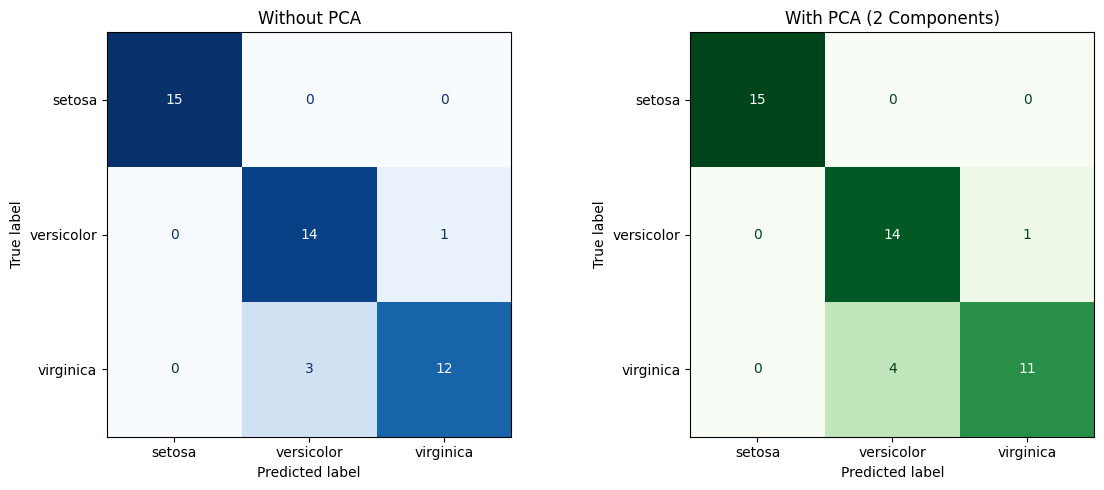

In [ ]:

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cm_no_pca = confusion_matrix(y_test, y_pred_no_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)

ConfusionMatrixDisplay(cm_no_pca, display_labels=target_names).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Without PCA")

ConfusionMatrixDisplay(cm_pca, display_labels=target_names).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("With PCA (2 Components)")
plt.tight_layout()
plt.show()

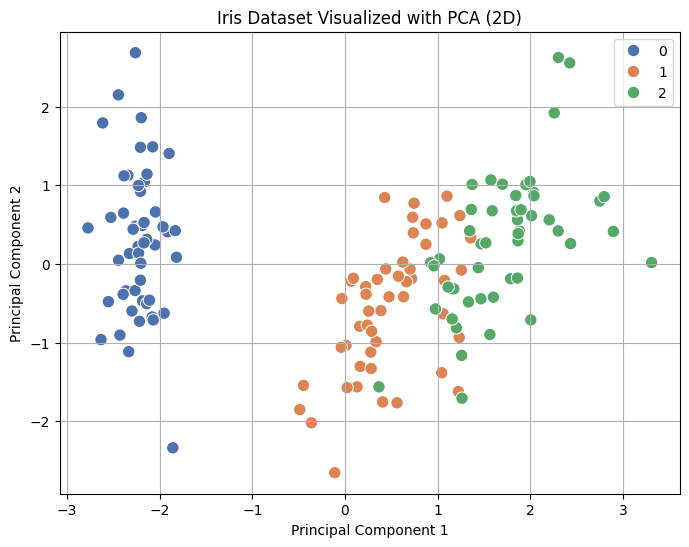

In [ ]:

# Visualize 2D PCA components
X_pca_all = pca.fit_transform(scaler.fit_transform(X))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_all[:, 0], y=X_pca_all[:, 1], hue=data.target, palette='deep', s=80)
plt.title("Iris Dataset Visualized with PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# On MNIST Dataset

In [ ]:
# Install required libraries (if not installed)
!pip install -q scikit-learn matplotlib seaborn


In [ ]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load MNIST dataset
print("Downloading MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47

In [ ]:

X = mnist.data
y = mnist.target.astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Before Applying PCA (Without PCA)
print("Original number of features:", X_train.shape[1])


Original number of features: 784


In [ ]:
# Logistic Regression WITHOUT PCA
model_no_pca = LogisticRegression(max_iter=10, solver='saga', n_jobs=-1)
print("Training Logistic Regression WITHOUT PCA...")
model_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = model_no_pca.predict(X_test_scaled)
acc_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy WITHOUT PCA: {acc_no_pca:.4f}")


Training Logistic Regression WITHOUT PCA...
Accuracy WITHOUT PCA: 0.8983


In [ ]:
# PCA with 50 components
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# After Applying PCA
print("Number of features after PCA:", X_train_pca.shape[1])

# Logistic Regression WITH PCA
model_pca = LogisticRegression(max_iter=10, solver='saga', n_jobs=-1)
print("Training Logistic Regression WITH PCA...")
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy WITH PCA (50 components): {acc_pca:.4f}")



Number of features after PCA: 300
Training Logistic Regression WITH PCA...
Accuracy WITH PCA (50 components): 0.8976


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


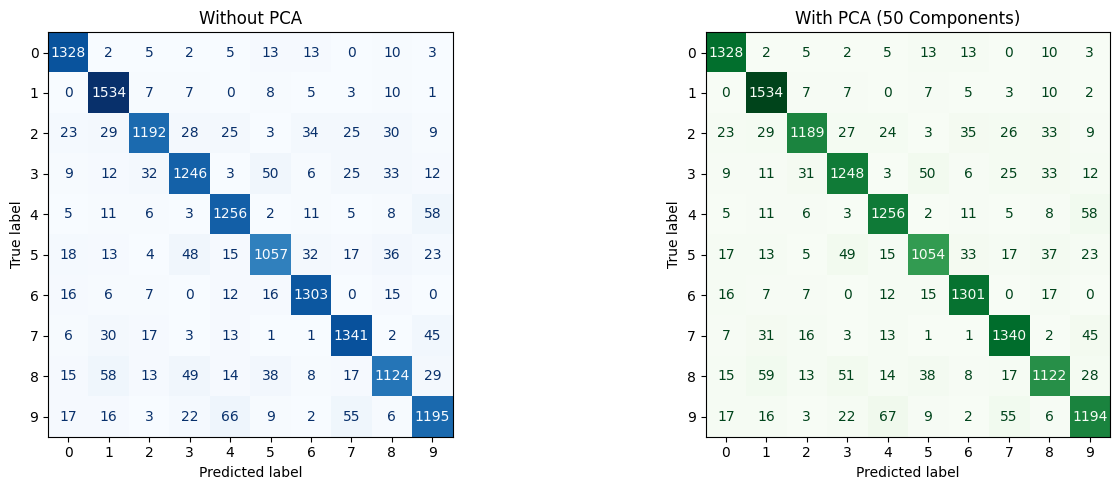

In [ ]:
# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cm_no_pca = confusion_matrix(y_test, y_pred_no_pca)
cm_pca = confusion_matrix(y_test, y_pred_pca)

ConfusionMatrixDisplay(cm_no_pca).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Without PCA")

ConfusionMatrixDisplay(cm_pca).plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("With PCA (50 Components)")
plt.tight_layout()
plt.show()


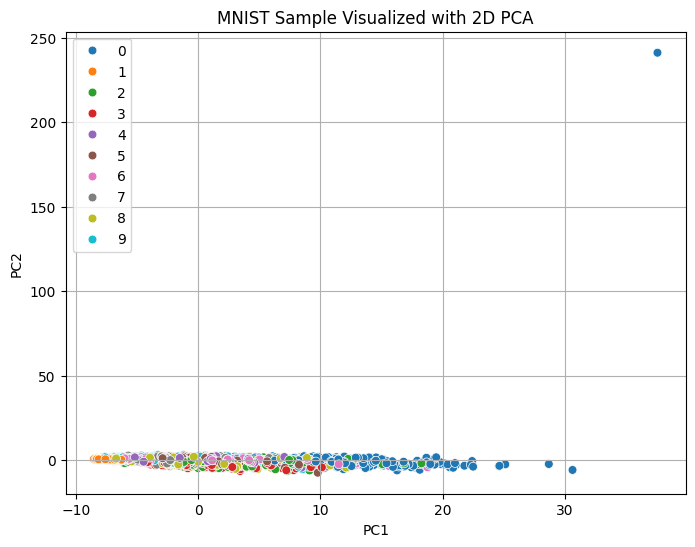

In [ ]:
# Visualize first 2 PCA components for 2000 points
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled[:2000])
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_train[:2000], palette='tab10', legend='full', s=40)
plt.title("MNIST Sample Visualized with 2D PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# ***GridSearchCV*** | 16-July-2025

***What is GridSearchCV?***
*  GridSearchCV is a tool that automatically tests many combinations of hyperparameters and finds the best one.

* It uses Cross-Validation (CV) to make sure results are reliable and not just by chance.

Imagine you're buying a new mobile phone.
You try different combinations:

```
* Brands: Samsung, Apple, Xiaomi
* Storage: 128GB, 256GB
* RAM: 6GB, 8GB
```

You compare **all combinations and pick the best phone** for your needs.

**>>>>> GridSearchCV does the same for ML models. <<<<<**

**What will GridSearchCV do in our case:**
Try different combinations of:

* learning_rate: how fast the model learns
* batch_size: number of images trained in each step

Use KerasClassifier (scikit-learn wrapper)

Evaluate which combination performs best on validation data


In [ ]:
!pip install scikit-learn matplotlib seaborn
!pip install scikeras tensorflow --upgrade

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import tensorflow as tf


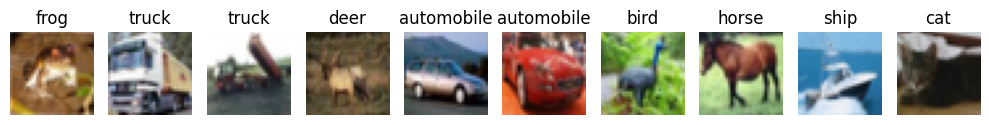

In [ ]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Show some images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()


In [ ]:
def create_model(learning_rate=0.001):
    base_model = MobileNetV2(include_top=False, input_shape=(32, 32, 3), weights=None)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model


In [ ]:
learning_rates = [0.01, 0.001,0.0001]
batch_sizes = [16, 32]
epochs_list = [5, 10, 15, 20]  # You can expand this if needed

best_acc = 0
best_params = {}
best_model = None
best_history = None

# Manual grid search
for lr in learning_rates:
    for bs in batch_sizes:
        for ep in epochs_list:
            print(f"Training with LR={lr}, Batch Size={bs}, Epochs={ep}")
            model = create_model(learning_rate=lr)
            history = model.fit(x_train, y_train,
                                epochs=ep,
                                batch_size=bs,
                                validation_data=(x_test, y_test),
                                verbose=1)

            val_acc = history.history['val_accuracy'][-1]
            print(f"→ Validation Accuracy: {val_acc:.4f}")

            # Save if it's the best so far
            if val_acc > best_acc:
                best_acc = val_acc
                best_params = {'lr': lr, 'bs': bs, 'epochs': ep}
                best_model = model
                best_history = history


Training with LR=0.01, Batch Size=16, Epochs=5
Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 91s 16ms/step - accuracy: 0.0995 - loss: 2.3620 - val_accuracy: 0.1000 - val_loss: 2.3040
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.0989 - loss: 2.3047 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.1045 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3031
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.1009 - loss: 2.3042 - val_accuracy: 0.1000 - val_loss: 2.3051
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.0991 - loss: 2.3044 - val_accuracy: 0.1000 - val_loss: 2.3059
→ Validation Accuracy: 0.1000
Training with LR=0.01, Batch Size=32, Epochs=5
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 30ms/step - accuracy: 0.0967 - loss: 2.3901 - val_accuracy: 0.1000 - val_loss: 2.3047
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.0958 - loss: 2.3044 -

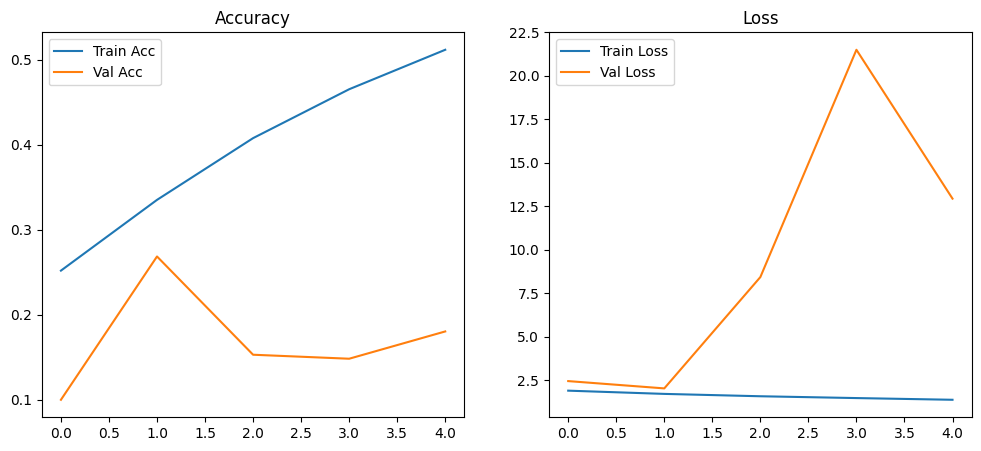


Best Parameters: LR=0.005, Batch Size=32, Epochs=5


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'], label='Train Acc')
plt.plot(best_history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

print(f"\nBest Parameters: LR={best_params['lr']}, Batch Size={best_params['bs']}, Epochs={best_params['epochs']}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step


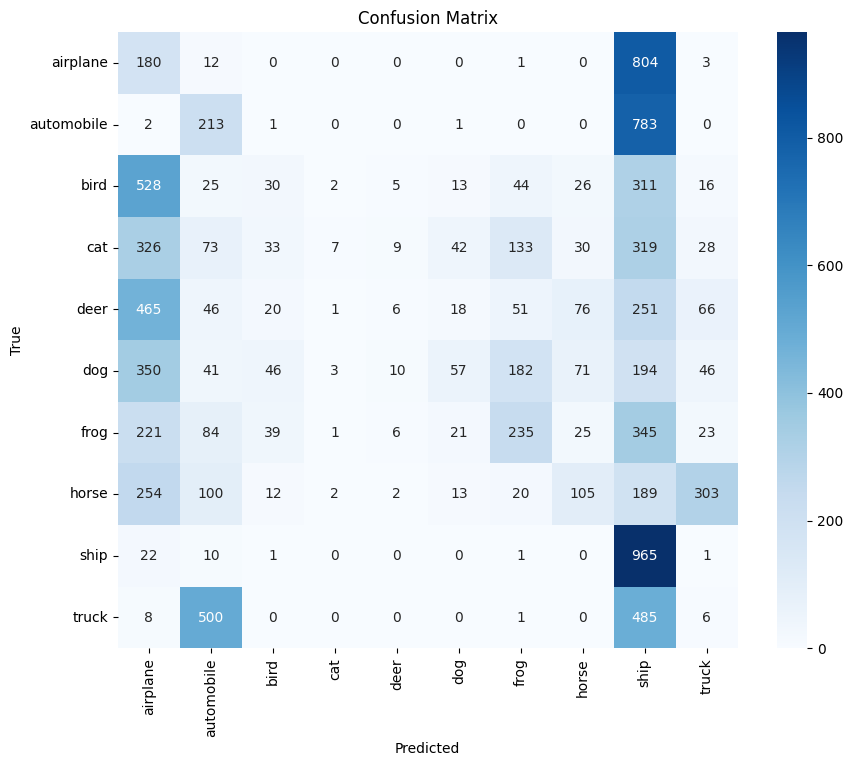

              precision    recall  f1-score   support

    airplane       0.08      0.18      0.11      1000
  automobile       0.19      0.21      0.20      1000
        bird       0.16      0.03      0.05      1000
         cat       0.44      0.01      0.01      1000
        deer       0.16      0.01      0.01      1000
         dog       0.35      0.06      0.10      1000
        frog       0.35      0.23      0.28      1000
       horse       0.32      0.10      0.16      1000
        ship       0.21      0.96      0.34      1000
       truck       0.01      0.01      0.01      1000

    accuracy                           0.18     10000
   macro avg       0.23      0.18      0.13     10000
weighted avg       0.23      0.18      0.13     10000



In [ ]:
y_pred = np.argmax(best_model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred, target_names=class_names))


In [ ]:

# # Main Code is giving me some Library Compatibility Error - So I generated my own.

# # Use build_fn instead of model for KerasClassifier
# model = KerasClassifier(build_fn=create_model, verbose=0)

# param_grid = {
#     "batch_size": [32, 64],
#     "epochs": [5],  # Keep small for demo; increase for real run
#     # Refer to parameters of create_model directly if using build_fn
#     "learning_rate": [0.001, 0.0001]
# }

# # cv is so important, prevents the model from overfitting tell how many time to take the data and how
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

In [ ]:
# grid_result = grid.fit(x_train, y_train)
# print("Best Parameters:", grid_result.best_params_)
# print("Best Accuracy:", grid_result.best_score_)

# Giving me error.

In [ ]:
# # Get best model params
# best_lr = grid_result.best_params_['model__learning_rate']
# best_bs = grid_result.best_params_['batch_size']

# # Train best model again for visualization
# best_model = create_model(learning_rate=best_lr)
# history = best_model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat),
#                          epochs=10, batch_size=best_bs)

# # Plot accuracy & loss
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Train')
# plt.plot(history.history['val_accuracy'], label='Val')
# plt.title('Accuracy')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Train')
# plt.plot(history.history['val_loss'], label='Val')
# plt.title('Loss')
# plt.legend()

# plt.show()


In [ ]:
# # Predict classes
# y_pred_probs = best_model.predict(x_test)
# y_pred = np.argmax(y_pred_probs, axis=1)
# y_true = y_test.flatten()

# # Confusion Matrix
# cm = confusion_matrix(y_true, y_pred)

# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix")
# plt.show()

# # Classification Report
# print(classification_report(y_true, y_pred, target_names=class_names))
